In [83]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [84]:
## Extract information from the loaded object
diabetes_in = datasets.load_diabetes()
diabetes_data = diabetes_in.data
diabetes_names = diabetes_in.feature_names
diabetes_target = diabetes_in.target

In [85]:
print(diabetes_in.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [86]:
## Put data into a pandas dataframe
diabetes = pd.DataFrame(data = diabetes_data, columns = diabetes_names)
diabetes["prog"] = diabetes_target

diabetes.head(n=20)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


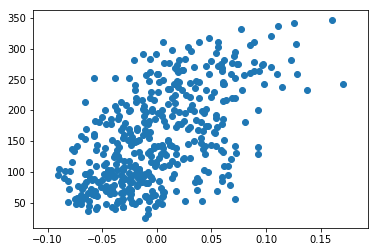

In [87]:
plt.scatter(diabetes["bmi"], diabetes["prog"])

In [88]:
## Train a simple linear model with one feature using gradient descent
train = diabetes[["bmi","prog"]]
n = len(train)
x = np.array(train["bmi"])
y = np.array(train["prog"])
w = 0
b = 0
curr_iter = 0
prev_cost = np.inf

alpha = .8
tol = .01
max_iter = 1e6
while curr_iter < max_iter:
    y_hat = x * w + b
    dw = (1 / n) * np.sum(x * (y_hat - y))
    db = (1 / n) * np.sum((y_hat - y))
    w = w - alpha * dw
    b = b - alpha * db
    cost = (1 / (2*n)) * np.sum(np.square((y_hat - y)))
    if curr_iter % 100 == 0:
        print("Epoch " + str(int(curr_iter/100)) + " cost: " + str(cost))
        if abs(prev_cost - cost) <= tol:
            print("Converge at cost " + str(cost))
            break
        prev_cost = cost
    curr_iter += 1
    if curr_iter == max_iter:
        print("Warning: Did not converge.")

Epoch 0 cost: 14537.240950226245
Epoch 1 cost: 2655.0108656762927
Epoch 2 cost: 2439.279785523131
Epoch 3 cost: 2289.11793842525
Epoch 4 cost: 2184.5962334032433
Epoch 5 cost: 2111.8428207898105
Epoch 6 cost: 2061.202056311409
Epoch 7 cost: 2025.953029017211
Epoch 8 cost: 2001.417579404932
Epoch 9 cost: 1984.339426222085
Epoch 10 cost: 1972.4520012616372
Epoch 11 cost: 1964.1776363067554
Epoch 12 cost: 1958.4181790959308
Epoch 13 cost: 1954.4092494023298
Epoch 14 cost: 1951.6187924721119
Epoch 15 cost: 1949.676466097113
Epoch 16 cost: 1948.3244897572656
Epoch 17 cost: 1947.3834326584
Epoch 18 cost: 1946.7284001425012
Epoch 19 cost: 1946.272457992549
Epoch 20 cost: 1945.955094748653
Epoch 21 cost: 1945.7341907840014
Epoch 22 cost: 1945.5804282972065
Epoch 23 cost: 1945.4734003297244
Epoch 24 cost: 1945.3989024072328
Epoch 25 cost: 1945.3470473586315
Epoch 26 cost: 1945.310953116328
Epoch 27 cost: 1945.2858293460765
Epoch 28 cost: 1945.2683416862349
Epoch 29 cost: 1945.2561692199338
Epoc

In [91]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color="red")

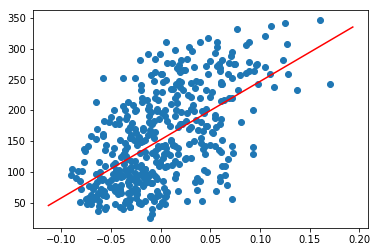

In [92]:
plt.scatter(diabetes["bmi"], diabetes["prog"])
abline(w, b)

In [93]:
0.05*w + b

199.39854176770965

In [94]:
## Train a linear model with all ten features using gradient descent
train = diabetes
n = len(train)
x = train.drop("prog", axis=1).values # n x m
y = train["prog"].values # n x 1
w = np.zeros((x.shape[1],1)) # m x 1
b = 0
curr_iter = 0
prev_cost = np.inf

alpha = 1
tol = .01
max_iter = 1e6
while curr_iter < max_iter:
    y_hat = np.matmul(x, w) + b # [n x m] * [m x 1] = [n x 1]
    dw = (1 / n) * np.matmul(x.transpose(), (y_hat - y.reshape(n,1))) # [m x n] * [n x 1] = [m x 1]
    db = (1 / n) * np.sum((y_hat - y.reshape(n,1)))
    w = w - alpha * dw
    b = b - alpha * db
    cost = (1 / (2*n)) * np.sum(np.square((y_hat - y.reshape(n,1))))
    if curr_iter % 10000 == 0:
        print("Epoch " + str(int(curr_iter/10000)) + " cost: " + str(cost))
        if abs(prev_cost - cost) <= tol:
            print("Converge at cost " + str(cost))
            break
        prev_cost = cost
    curr_iter += 1
    if curr_iter == max_iter:
        print("Warning: Did not converge.")

Epoch 0 cost: 14537.240950226245
Epoch 1 cost: 1437.4537556007026
Epoch 2 cost: 1435.0033415197925
Epoch 3 cost: 1433.3465941511438
Epoch 4 cost: 1432.2221084258629
Epoch 5 cost: 1431.4587591501374
Epoch 6 cost: 1430.9405611881484
Epoch 7 cost: 1430.5887835463118
Epoch 8 cost: 1430.3499800002762
Epoch 9 cost: 1430.1878686923144
Epoch 10 cost: 1430.0778197562493
Epoch 11 cost: 1430.0031132568608
Epoch 12 cost: 1429.9523988996812
Epoch 13 cost: 1429.9179715600899
Epoch 14 cost: 1429.8946006297008
Epoch 15 cost: 1429.87873532051
Epoch 16 cost: 1429.8679651872064
Epoch 17 cost: 1429.860653903828
Converge at cost 1429.860653903828


In [64]:
## Split into train and test sets to prepare for cross validation
np.random.seed(4)
mask = np.random.choice(n, n, replace=False) >= n*.8
train = diabetes[~mask]
test = diabetes[mask]

x_train_bmi = train["bmi"].values
x_train_all = train.drop("prog", axis=1).values
y_train = train["prog"].values

x_test_bmi = test["bmi"].values
x_test_all = test.drop("prog", axis=1).values
y_test = test["prog"].values

In [65]:
## Train models using sklearn for both single feature and all features
from sklearn.linear_model import LinearRegression

linreg_bmi = LinearRegression()
linreg_bmi.fit(x_train_bmi.reshape(len(x_train_bmi),1),y_train)
y_hat_test_bmi = linreg_bmi.predict(x_test_bmi.reshape(len(x_test_bmi),1))

linreg_all = LinearRegression()
linreg_all.fit(x_train_all, y_train)
y_hat_test_all = linreg_all.predict(x_test_all)

In [66]:
predictions = pd.DataFrame(data = {"pred_bmi": y_hat_test_bmi, "pred_all": y_hat_test_all, "actual": y_test})

In [67]:
## Calculate average percent deviation
diff_bmi = []
diff_all = []
for i in predictions.index:
    diff_bmi.append(abs(predictions.loc[i,"pred_bmi"] - predictions.loc[i,"actual"]) / predictions.loc[i,"actual"])
    diff_all.append(abs(predictions.loc[i,"pred_all"] - predictions.loc[i,"actual"]) / predictions.loc[i,"actual"])

In [68]:
print("Average deviation, BMI only: " + str(np.round(np.mean(diff_bmi)*100, 2)) + "%")
print("Average deviation, all features: " + str(np.round(np.mean(diff_all)*100, 2)) + "%")

Average deviation, BMI only: 45.37%
Average deviation, all features: 37.61%


In [24]:
predictions.head(n=10)

,actual,pred_all,pred_bmi
0,166.0,222.013811,196.220087
1,68.0,113.007114,150.054058
2,245.0,247.239263,214.471773
3,137.0,99.225994,77.047314
4,129.0,163.400757,198.367344
5,102.0,92.079007,123.213343
6,190.0,145.370766,142.538658
7,75.0,70.528406,112.477057
8,52.0,212.995957,195.146458
9,37.0,81.320743,91.004486
